<a href="https://colab.research.google.com/github/MiguelRFerreiraF/Bitmap_drawing/blob/main/Code_randerson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quandl

import quandl
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Get the stock data

'''Here is used a library called Quandl for finacial data obtaining'''

df = quandl.get("WIKI/GOOGL")

# Take a look at the data

print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [ ]:
print(df.tail())

               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
2018-03-21  1092.57  1108.70  1087.21  1094.00  1990515.0          0.0   
2018-03-22  1080.01  1083.92  1049.64  1053.15  3418154.0          0.0   
2018-03-23  1051.37  1066.78  1024.87  1026.55  2413517.0          0.0   
2018-03-26  1050.60  1059.27  1010.58  1054.09  3272409.0          0.0   
2018-03-27  1063.90  1064.54   997.62  1006.94  2940957.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0    1092.57    1108.70   1087.21     1094.00   
2018-03-22          1.0    1080.01    1083.92   1049.64     1053.15   
2018-03-23          1.0    1051.37    1066.78   1024.87     1026.55   
2018-03-26          1.0    1050.60    1059.27   1010.58     1054.09   
2018-03-27          1.0    1063.90    1064.54    997.62

In [1]:
# Get the Adjusted Close Price 

'''Here we produce a separation of the important features, since we're want
to predict only a specifical financial data (price)'''

df = df[['Adj. Close']] 

# Take a look at the new data 
print(df.head())

NameError: ignored

In [ ]:
# A variable for predicting 'n' days out into the future

forecast_out = 30 #'n=30' days

#Create another column (the target ) shifted 'n' units up

df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)

#print the new data set

print(df.tail())

            Adj. Close  Prediction
Date                              
2018-03-21     1094.00         NaN
2018-03-22     1053.15         NaN
2018-03-23     1026.55         NaN
2018-03-26     1054.09         NaN
2018-03-27     1006.94         NaN


In [ ]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[  50.32284179]
 [  54.32268894]
 [  54.86937651]
 ...
 [1005.6       ]
 [1043.43      ]
 [1054.56      ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[  66.49526451   67.73910413   69.39922877 ... 1026.55       1054.09
 1006.94      ]


In [ ]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [ ]:
#Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9690485328355797


In [ ]:
# Create and train the Linear Regression Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9811224781763931


In [ ]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[1054.14]
 [1072.7 ]
 [1091.36]
 [1095.5 ]
 [1103.59]
 [1113.75]
 [1109.9 ]
 [1128.09]
 [1143.7 ]
 [1117.51]
 [1103.92]
 [1071.41]
 [1084.14]
 [1094.76]
 [1100.9 ]
 [1115.04]
 [1129.38]
 [1160.84]
 [1165.93]
 [1139.91]
 [1148.89]
 [1150.61]
 [1134.42]
 [1100.07]
 [1095.8 ]
 [1094.  ]
 [1053.15]
 [1026.55]
 [1054.09]
 [1006.94]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[1072.44748887 1091.26544838 1110.18479776 1114.3823383  1122.58477862
 1132.88598922 1128.9824793  1147.4252963  1163.2522547  1136.69824826
 1122.91936519 1089.95751908 1102.86444929 1113.63205328 1119.85739117
 1134.19391852 1148.7332256  1180.63047809 1185.79122237 1159.4095787
 1168.51438886 1170.25829459 1153.84327495 1119.01585527 1114.6865079
 1112.86149028 1071.44372917 1044.47402427 1072.39679393 1024.59147114]
[1014.91533798 1104.44613005 1083.17468288 1108.56704879  613.15144057
 1117.02843917 1072.41049995  862.58231099 1086.16442945 1114.19346372
  615.1058121  1097.40300529 1172.61608579 1130.12485073  637.83723936
 1109.18452801 1028.51728417  770.48902388  994.23217011 1056.16138865
  632.2374896   610.60839288 1027.23503361  673.6615888  1093.08309441
 1135.50473964 1072.01367466 1047.74796798 1016.64157712 1070.26826621]


In [ ]:
# ABAIXO, SEGUE UM ENXERTO MEU, MOSTRANDO EM GRÁFICO OS ÚLTIMOS 100 PREGÕES DO ATIVO, E 
# DEPOIS O GRÉFICO COM AS PREVISÕES FEITAS PELO MODELO DE REGRESSÃO LINEAR, QUE EM GERAL 
# SEMPRE SE SAI MELHOR.

In [ ]:
# EU RETIREI MOMENTANEAMENTE ESTA PARTE DO CÓDIGO, POIS ELA NÃO ESTÁ RODANDO DO JEITO
# QUE EU QUERO.  

'''

import matplotlib.pyplot as plt

ta = df.tail(100)

plt.plot(ta, color="black", label=f"precos reais")
plt.title(f" Share Price")
plt.xlabel("Time")
plt.ylabel(f" Share Price")
plt.legend()
plt.show()

'''

'\n\nimport matplotlib.pyplot as plt\n\nta = df.tail(100)\n\nplt.plot(ta, color="black", label=f"precos reais")\nplt.title(f" Share Price")\nplt.xlabel("Time")\nplt.ylabel(f" Share Price")\nplt.legend()\nplt.show()\n\n'

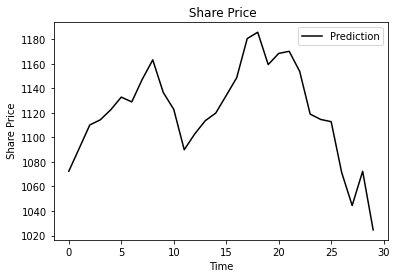

In [ ]:

import matplotlib.pyplot as plt

'''plt.plot(df, color="black", label=f"precos reais")''' # DEPOIS PRETENDO DAR 
# UM JEITO DE JUNTAR TODOS OS GRÁFICOS NUM SÓ PARA VER COMO A PREVISÃO DÁ 
# CONTINUIDADE AO PREÇO REAL DO ATIVO.

plt.plot(lr_prediction, color = "black", label=f"Prediction")
plt.title(f" Share Price")
plt.xlabel("Time")
plt.ylabel(f" Share Price")
plt.legend()
plt.show()

